In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101.0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300.0,0.0,0,no
1,yes,adult,534817.0,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208.0,0.0,0,no
2,no,adult,530334.0,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0.0,0.0,0,yes
3,yes,young,5290409.0,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208.0,0.0,0,yes
4,no,adult,530255.0,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300.0,0.0,0,no


In [3]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [4]:
df.isnull().sum()

surgery                    6
age                        6
hospital_number            6
rectal_temp               65
pulse                     30
respiratory_rate          64
temp_of_extremities       61
peripheral_pulse          73
mucous_membrane           52
capillary_refill_time     37
pain                      60
peristalsis               49
abdominal_distention      60
nasogastric_tube         107
nasogastric_reflux       109
nasogastric_reflux_ph    246
rectal_exam_feces        107
abdomen                  124
packed_cell_volume        35
total_protein             38
abdomo_appearance        168
abdomo_protein           201
outcome                    6
surgical_lesion            6
lesion_1                   6
lesion_2                   6
lesion_3                   0
cp_data                    0
dtype: int64

In [5]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.930000e+02,234.000000,269.000000,235.000000,53.000000,264.000000,261.000000,98.000000,293.000000,293.000000,299.000000
mean,1.099119e+06,38.185470,71.955390,30.455319,4.707547,46.291667,23.947126,3.054082,3676.843003,92.382253,7.387960
std,1.545596e+06,0.726124,28.632349,17.654844,1.982311,10.469227,27.235245,1.986821,5456.191460,657.157039,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.000000,0.000000,0.000000
50%,5.302970e+05,38.200000,64.000000,26.000000,5.000000,45.000000,7.500000,2.250000,2322.000000,0.000000,0.000000
75%,5.347560e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.000000,4.050000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


<Axes: >

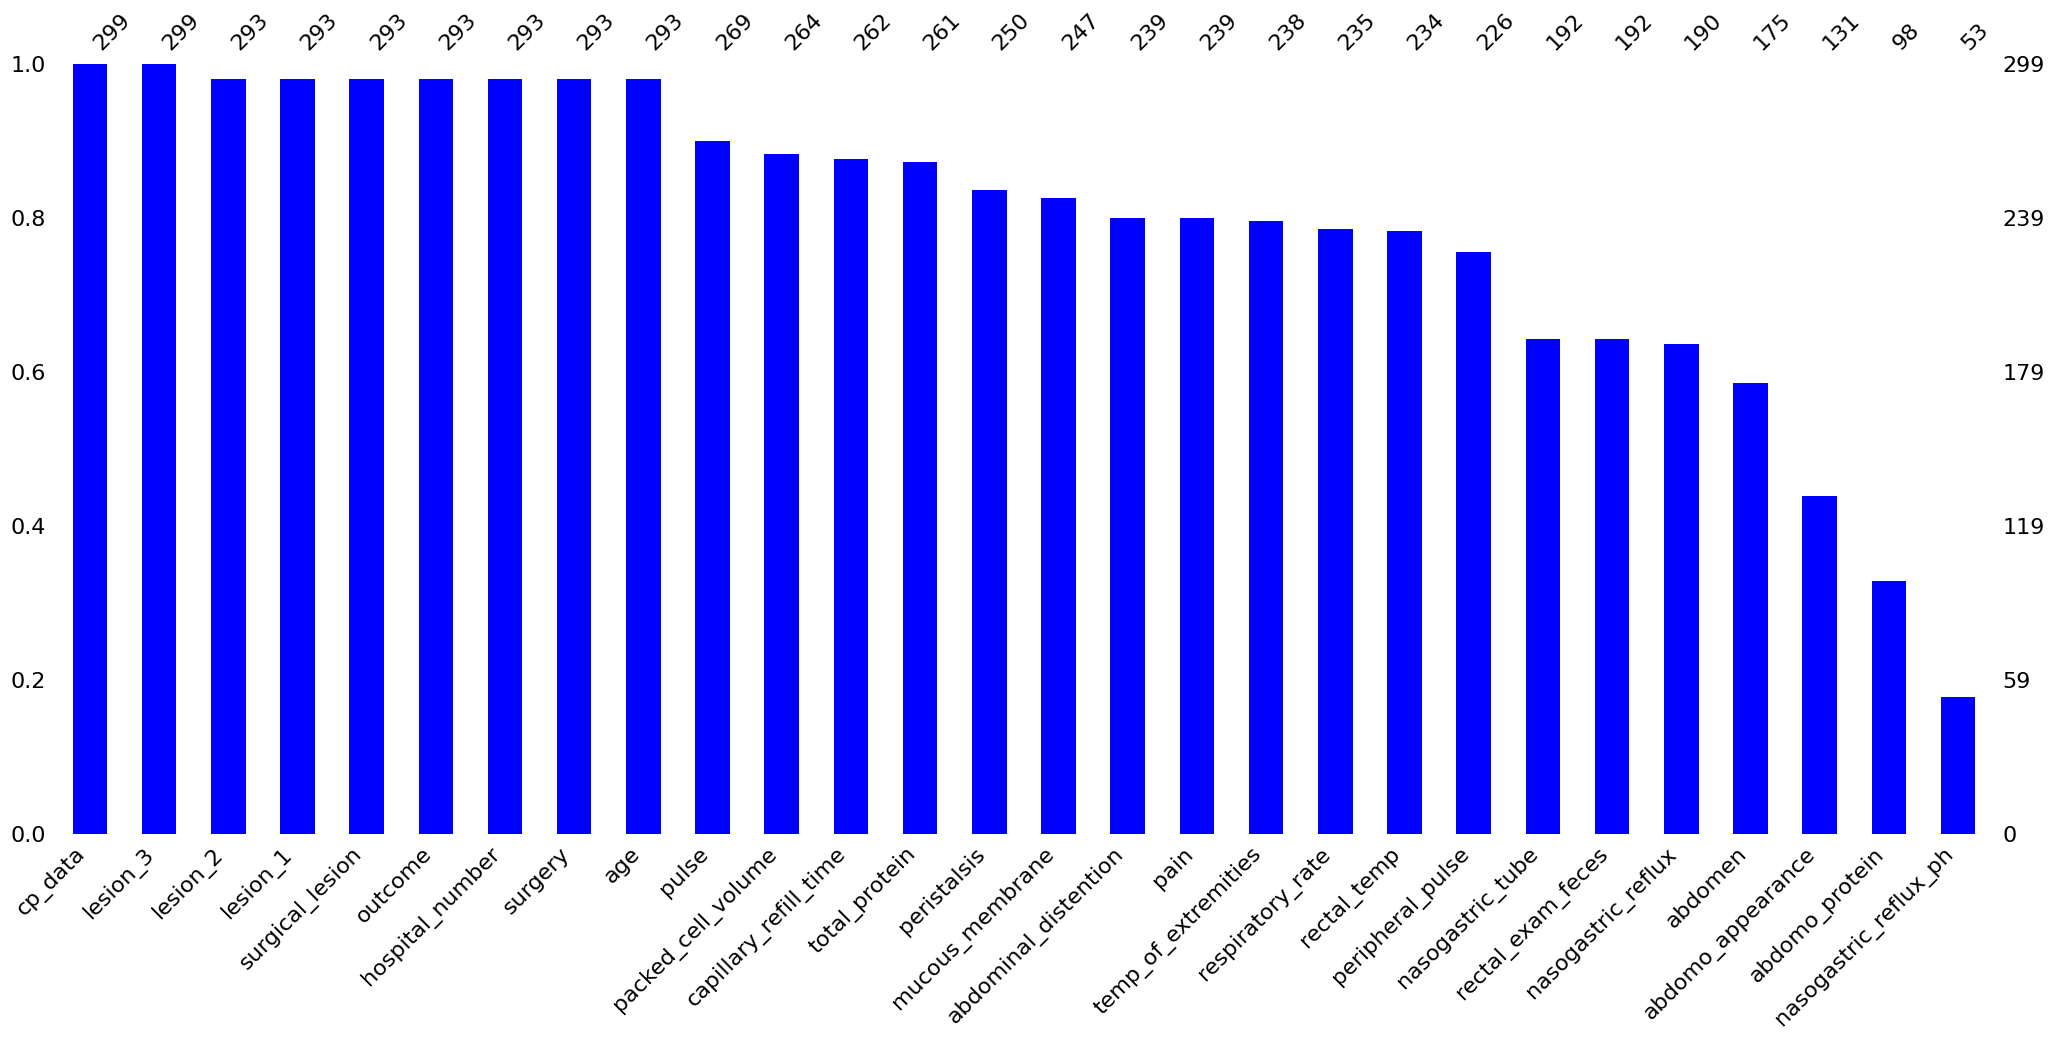

In [6]:
import missingno as mns
mns.bar(df, sort='descending', color='blue')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                293 non-null    object 
 1   age                    293 non-null    object 
 2   hospital_number        293 non-null    float64
 3   rectal_temp            234 non-null    float64
 4   pulse                  269 non-null    float64
 5   respiratory_rate       235 non-null    float64
 6   temp_of_extremities    238 non-null    object 
 7   peripheral_pulse       226 non-null    object 
 8   mucous_membrane        247 non-null    object 
 9   capillary_refill_time  262 non-null    object 
 10  pain                   239 non-null    object 
 11  peristalsis            250 non-null    object 
 12  abdominal_distention   239 non-null    object 
 13  nasogastric_tube       192 non-null    object 
 14  nasogastric_reflux     190 non-null    object 
 15  nasoga

<Axes: >

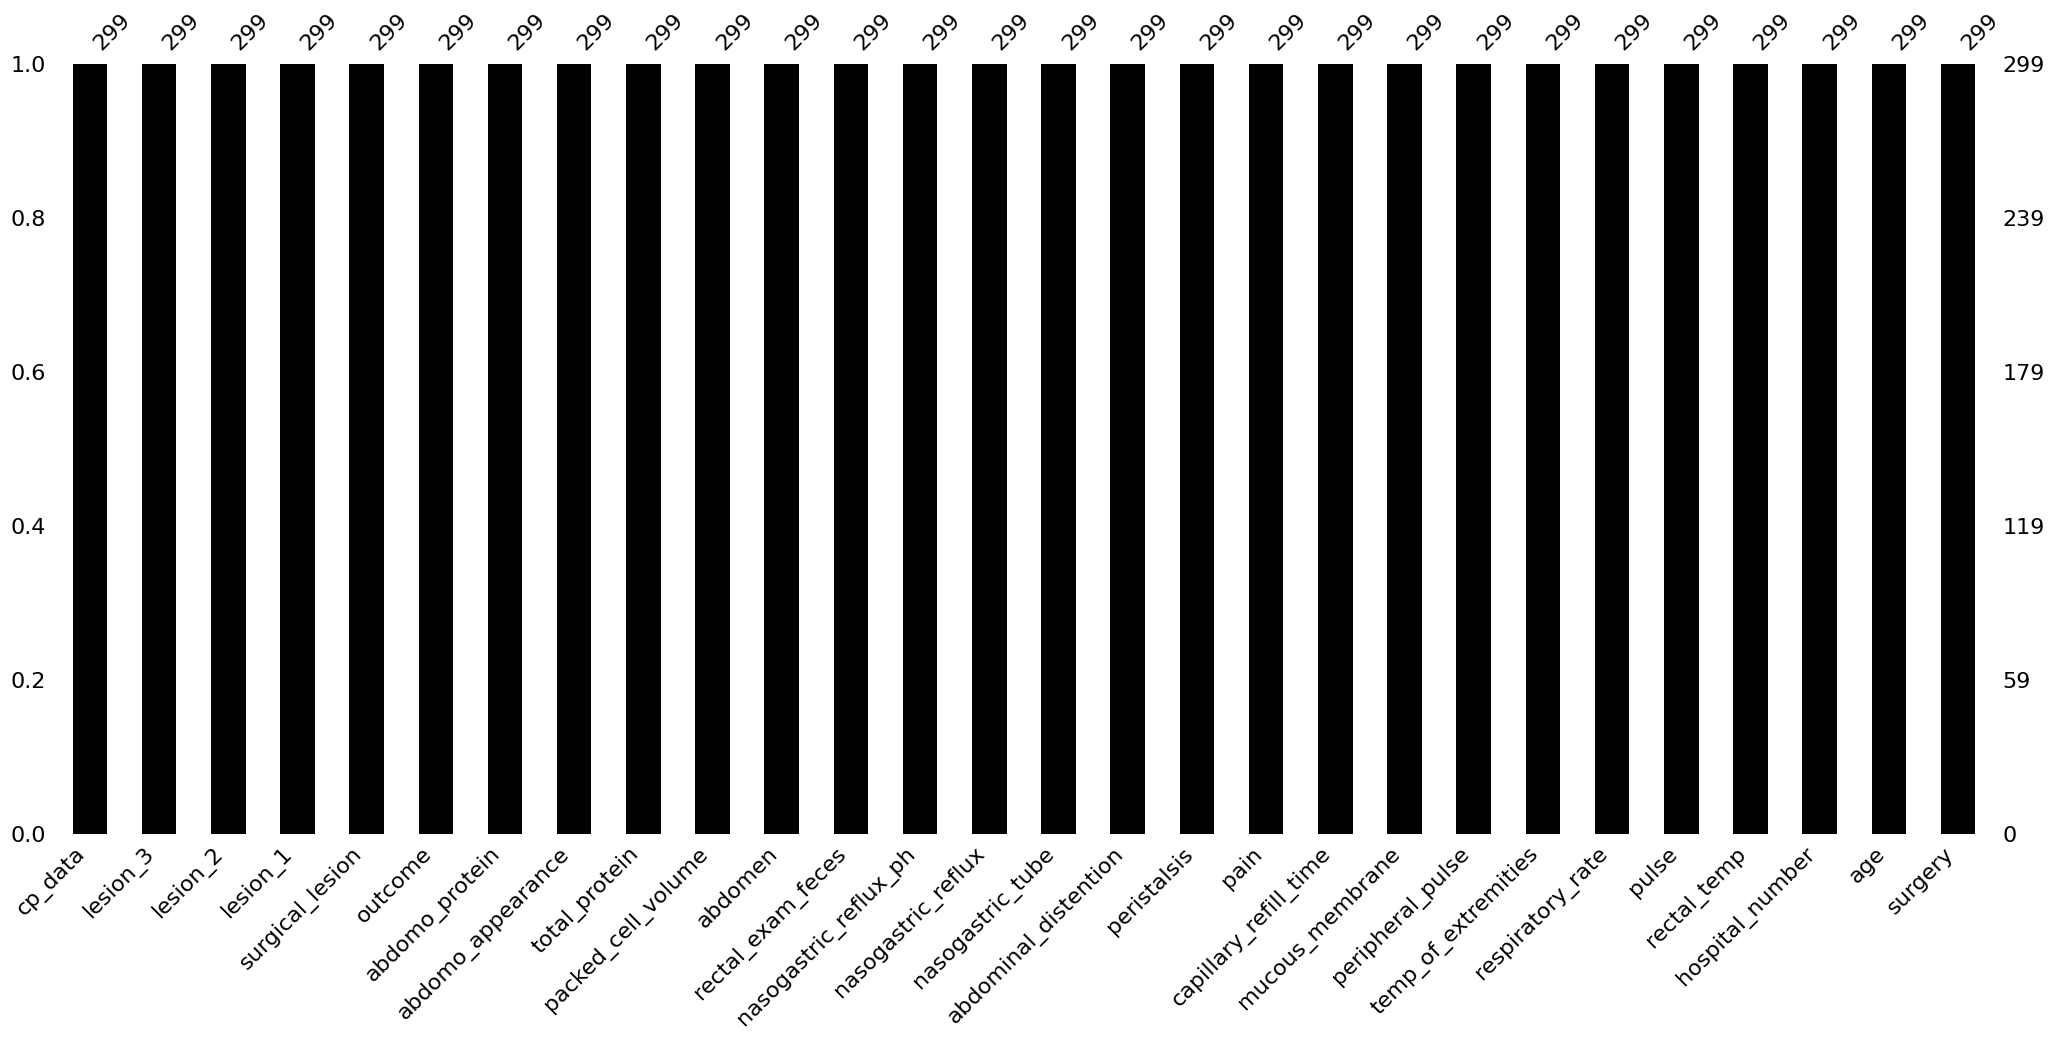

In [8]:
import warnings
warnings.filterwarnings("ignore")
category = df.select_dtypes(include=['object','category'])
numerical = df.select_dtypes(include=['int','float'])
for x in category:
    df[x].fillna(df[x].mode()[0],inplace=True)
for x in numerical:
    df[x].fillna(df[x].mean(),inplace=True)
import missingno as mns
mns.bar(df, sort='descending',color = 'black')

In [9]:
df.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [10]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [11]:
from sklearn.utils import resample
df_lived = df[df['outcome']=='lived']
df_died = df[df['outcome']=='died']
df_euthanized = df[df['outcome']=='euthanized']
df_died_sam = resample(df_died, n_samples=182)
df_euthanized_sam = resample(df_euthanized, n_samples=182)
df = pd.concat([df_lived,df_died_sam,df_euthanized_sam])
df= df.sample(frac=1)
df['outcome'].value_counts()

outcome
lived         182
euthanized    182
died          182
Name: count, dtype: int64

In [13]:
category = df.select_dtypes(include=['object','category'])
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in category:
     df[x]= encoder.fit_transform(df[x])
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
282,1,0,527758.0,38.20000,72.00000,18.000000,1,2,3,1,...,35.000000,6.400000,1,3.054082,2,1,3124.0,0.0,0,0
178,0,0,528151.0,38.50000,100.00000,30.455319,1,3,1,2,...,46.291667,23.947126,1,3.054082,1,0,1111.0,0.0,0,1
254,1,1,5294539.0,38.80000,184.00000,84.000000,2,2,3,1,...,33.000000,3.300000,1,3.054082,0,1,7111.0,0.0,0,0
43,1,0,534069.0,38.18547,120.00000,30.455319,1,0,4,1,...,52.000000,67.000000,1,2.000000,1,1,3205.0,0.0,0,0
115,0,0,533723.0,38.18547,71.95539,40.000000,1,2,3,1,...,45.000000,70.000000,1,3.054082,2,0,0.0,0.0,0,0


In [14]:
x = df.drop(['outcome', 'hospital_number'],axis=1)
y = df['outcome']
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x,y, random_state = 42)
feature_importance = pd.DataFrame({'Feature':x.columns, 'Importance':mutual_info})
feature_importance.sort_values('Importance')
fig = px.bar(feature_importance, x = 'Feature', y='Importance',color= 'Feature')
fig.update_layout(height= 600, width=1000)
fig.show()

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

In [16]:
pred1 = model1.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.51      0.80      0.62        35
           1       0.57      0.49      0.52        35
           2       0.72      0.45      0.55        40

    accuracy                           0.57       110
   macro avg       0.60      0.58      0.57       110
weighted avg       0.60      0.57      0.57       110



In [18]:
import warnings
warnings.filterwarnings('ignore')
model1_tuning = LogisticRegression()
param_grid = {'penalty': ['l1','l2', 'elasticnet'],
    'C': [0.1,1,10,100],
    'solver': ['lbfgs', 'libliner','newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100,200,500],
    'multi_class': ['auto', 'ovr', 'multinomial']}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model1_tuning,param_grid=param_grid, cv=5, verbose=1, n_jobs=1)
grid_search.fit(xtrain,ytrain)
best_param = grid_search.best_params_
best_model1 = grid_search.best_estimator_
print(best_param)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
{'C': 1, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}


In [19]:
tuningpred1 =best_model1.predict(xtest)

In [20]:
print(classification_report(ytest,tuningpred1))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        35
           1       0.62      0.66      0.64        35
           2       0.64      0.57      0.61        40

    accuracy                           0.66       110
   macro avg       0.66      0.67      0.66       110
weighted avg       0.66      0.66      0.66       110



In [21]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [22]:
pred2 = model2.predict(xtest)
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        35
           1       0.81      1.00      0.90        35
           2       1.00      0.70      0.82        40

    accuracy                           0.88       110
   macro avg       0.90      0.89      0.88       110
weighted avg       0.90      0.88      0.88       110

